In [ ]:
include("../network_transmission_workplace.jl")

#work out number of staff and packages (parcel company)
NWeeks= 52
NPh = 3000
OccPattern = repeat([0.87,1.0,1.0,0.98,0.91,0.55,0],NWeeks)
NPvec = Int64.(round.(NPh*OccPattern))
NDh = Int64(round(NPh/80))
NLh = Int64(round(NPh/150))
NOh = Int64(round(NPh/300))
print(NDh,' ', NLh, ' ', NOh,'\n')

#other params
pasymp = 0.3

In [ ]:
Params1 = Dict("ND"=>NDh, "NL"=>NLh, "NO"=>NOh, "p_contact"=>0.1, "p_inf"=>0.2,
              "Pasymp"=>0.3, "Pisol"=>0.5, "InfInit"=>2, "tD"=>0.5, "phi"=>1.0)
PkgParams1 = Dict("p_fomite_contr"=>0.05, "p_fomite_trans"=>0.05,
                       "PkgHlife"=>1/6, "Dtime"=>1/8, "Ltime"=>1/8)
PairParams1 = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                    "fixed_driver_pairs"=>false, "fixed_loader_pairs"=>false,
                    "p_dpair_inf"=>0.75, "p_lpair_inf"=>0.5)

test = run_outbreak_sim(Params1, OccPattern, PkgParams1, NPvec, PairParams1, true)

In [ ]:
PairParams2 = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true,
                    "fixed_driver_pairs"=>true, "fixed_loader_pairs"=>true,
                    "p_dpair_inf"=>0.75, "p_lpair_inf"=>0.5)
test2 = run_outbreak_sim(Params1, OccPattern, PkgParams1, NPvec, PairParams2, true)

In [ ]:
#assume pair contact is about 20 times longer than other contacts
Ppair = 0.25
ct = -log(1 - Ppair)
Pinf = 1 - exp(-ct/20)

8.50326323651628
12.80710378266303
8.53393015149444
8.372897488127265


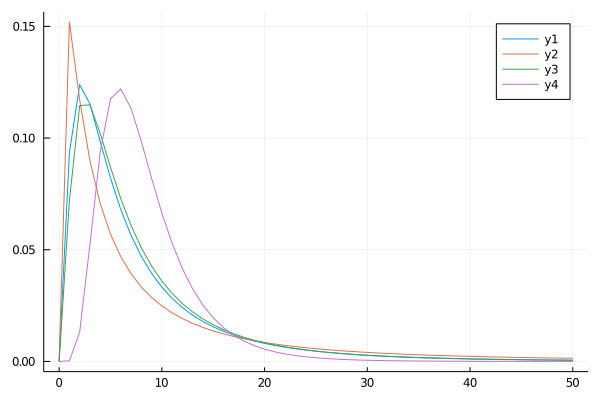

In [94]:
using Distributions
using Random
using StatsBase
using Plots

x = 0:50
mu,sig = 1.67,0.97
Plots.plot(x,pdf.(LogNormal(mu,sig),x))
print(exp(mu + sig^2/2),'\n')
mu,sig = 1.57,1.4
Plots.plot!(x,pdf.(LogNormal(mu,sig),x))
print(exp(mu + sig^2/2),'\n')
mu,sig = 1.73,0.91
Plots.plot!(x,pdf.(LogNormal(mu,sig),x))
print(exp(mu + sig^2/2),'\n')
mu,sig = 2.0,0.5
print(exp(mu + sig^2/2),'\n')
Plots.plot!(x,pdf.(LogNormal(mu,sig),x))



135-element Array{Int64,1}:
  1
  1
  1
  1
  1
  2
  2
  2
  2
  2
  2
  3
  3
  ⋮
 18
 19
 19
 19
 19
 19
 20
 20
 20
 20
 20
 20

In [18]:
print(node_degrees,'\n')
print(half_edges,'\n')

[5, 6, 6, 10, 4, 3, 5, 9, 8, 7, 8, 14, 12, 10, 3, 6, 5, 3, 5, 6]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20]


6.5
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


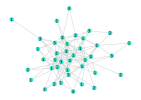

In [80]:
using LightGraphs
using GraphPlot

Ntot = 40
ND, NL, NO = 20, 10, 10
node_degrees = Int64.(round.(rand(LogNormal(1.67,0.97),Ntot)))
while any(node_degrees .> Ntot-1)
    Nleft = sum(node_degrees .> Ntot-1)
    node_degrees[node_degrees .> Ntot-1] .= Int64.(round.(rand(LogNormal(1.67,0.97),Nleft)))
end
half_edges = vcat(fill.(1:Ntot,node_degrees)...)


social_graph = SimpleGraph(Ntot)
nr = 1:Ntot
job = vcat(ones(Int64,ND),2 .* ones(Int64,NL),3 .* ones(Int64,NO))
phi = 1.0
while sum(node_degrees .> 0) > 1
    i = sample(nr, Weights(node_degrees))
    ijob = job[i]
    NDweights = node_degrees .* ((job .== ijob) + phi .* (job .!= ijob))
    j = sample(nr[nr .!= i], Weights(NDweights[nr .!= i]))
    add_edge!(social_graph,i,j)
    node_degrees[i] -= 1
    node_degrees[j] -= 1
end
print(2*ne(social_graph)/nv(social_graph),'\n')
print(node_degrees,'\n')
gplot(social_graph,nodelabel=job)


8.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


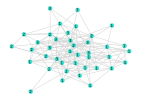

In [77]:
using LightGraphs
using GraphPlot

Ntot = 40
ND, NL, NO = 20, 10, 10
node_degrees = Int64.(round.(rand(LogNormal(2.0,0.5),Ntot)))
while any(node_degrees .> Ntot-1)
    Nleft = sum(node_degrees .> Ntot-1)
    node_degrees[node_degrees .> Ntot-1] .= Int64.(round.(rand(LogNormal(1.67,0.97),Nleft)))
end
half_edges = vcat(fill.(1:Ntot,node_degrees)...)


social_graph = SimpleGraph(Ntot)
nr = 1:Ntot
job = vcat(ones(Int64,ND),2 .* ones(Int64,NL),3 .* ones(Int64,NO))
phi = 0.5
while sum(node_degrees .> 0) > 1
    i = sample(nr, Weights(node_degrees))
    ijob = job[i]
    NDweights = node_degrees .* ((job .== ijob) + phi .* (job .!= ijob))
    j = sample(nr[nr .!= i], Weights(NDweights[nr .!= i]))
    add_edge!(social_graph,i,j)
    node_degrees[i] -= 1
    node_degrees[j] -= 1
end
print(2*ne(social_graph)/nv(social_graph),'\n')
print(node_degrees,'\n')
gplot(social_graph,nodelabel=job)


6.85
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


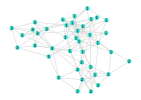

In [78]:
using LightGraphs
using GraphPlot

Ntot = 40
ND, NL, NO = 20, 10, 10
node_degrees = Int64.(round.(rand(LogNormal(2.0,0.5),Ntot)))
while any(node_degrees .> Ntot-1)
    Nleft = sum(node_degrees .> Ntot-1)
    node_degrees[node_degrees .> Ntot-1] .= Int64.(round.(rand(LogNormal(1.67,0.97),Nleft)))
end
half_edges = vcat(fill.(1:Ntot,node_degrees)...)


social_graph = SimpleGraph(Ntot)
nr = 1:Ntot
job = vcat(ones(Int64,ND),2 .* ones(Int64,NL),3 .* ones(Int64,NO))
phi = 0.1
while sum(node_degrees .> 0) > 1
    i = sample(nr, Weights(node_degrees))
    ijob = job[i]
    NDweights = node_degrees .* ((job .== ijob) + phi .* (job .!= ijob))
    j = sample(nr[nr .!= i], Weights(NDweights[nr .!= i]))
    add_edge!(social_graph,i,j)
    node_degrees[i] -= 1
    node_degrees[j] -= 1
end
print(2*ne(social_graph)/nv(social_graph),'\n')
print(node_degrees,'\n')
gplot(social_graph,nodelabel=job)


6.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


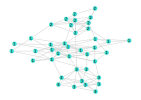

In [79]:
using LightGraphs
using GraphPlot

Ntot = 40
ND, NL, NO = 20, 10, 10
node_degrees = Int64.(round.(rand(LogNormal(2.0,0.5),Ntot)))
while any(node_degrees .> Ntot-1)
    Nleft = sum(node_degrees .> Ntot-1)
    node_degrees[node_degrees .> Ntot-1] .= Int64.(round.(rand(LogNormal(1.67,0.97),Nleft)))
end
half_edges = vcat(fill.(1:Ntot,node_degrees)...)


social_graph = SimpleGraph(Ntot)
nr = 1:Ntot
job = vcat(ones(Int64,ND),2 .* ones(Int64,NL),3 .* ones(Int64,NO))
phi = 0.05
while sum(node_degrees .> 0) > 1
    i = sample(nr, Weights(node_degrees))
    ijob = job[i]
    NDweights = node_degrees .* ((job .== ijob) + phi .* (job .!= ijob))
    j = sample(nr[nr .!= i], Weights(NDweights[nr .!= i]))
    add_edge!(social_graph,i,j)
    node_degrees[i] -= 1
    node_degrees[j] -= 1
end
print(2*ne(social_graph)/nv(social_graph),'\n')
print(node_degrees,'\n')
gplot(social_graph,nodelabel=job)


In [112]:
p1 = 0.12
OR = p1/(1-p1)
OR2 = 1.29^4*OR
p2 = OR2/(1+OR2)

0.2741115343524425

In [125]:
x = 4:12
OR = (1.29 .^ (x .- 10)) .* 0.24
p = OR ./ (1 .+ OR)
beta = -log.(1 .- p)

9-element Array{Float64,1}:
 0.05076938551343196
 0.065022944471233
 0.08311496313692526
 0.10598039468182022
 0.1347250192512355
 0.17062551703076334
 0.21511137961694557
 0.2697217470747881
 0.33603213979280894

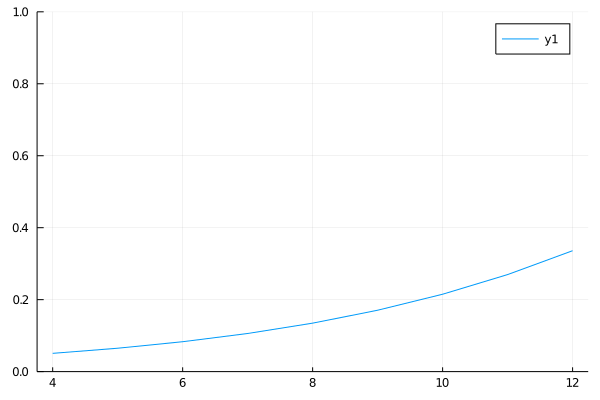

In [126]:
Plots.plot(x,beta,ylim=(0,1))